# HSE 2021: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1 points)
* [Task 2](#task2) (1 points)
* [Task 3](#task3) (1 points)
* [Task 4](#task4) (1 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

Download the file `data_Mar_64.txt`.

In [ ]:
#!wget https://raw.githubusercontent.com/AKuzina/ml_se/main/hw/hw_5/data_Mar_64.txt

In [2]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/ml/datasets/One-hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [3]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [4]:
import numpy as np
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics (e.g. Logistic regression).
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [5]:
#Код частично взяла из документации https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn import preprocessing

labelEncoder = preprocessing.LabelEncoder()
y = labelEncoder.fit_transform(y_name)
print(list(labelEncoder.classes_))

['Acer Campestre', 'Acer Capillipes', 'Acer Circinatum', 'Acer Mono', 'Acer Opalus', 'Acer Palmatum', 'Acer Pictum', 'Acer Platanoids', 'Acer Rubrum', 'Acer Rufinerve', 'Acer Saccharinum', 'Alnus Cordata', 'Alnus Maximowiczii', 'Alnus Rubra', 'Alnus Sieboldiana', 'Alnus Viridis', 'Arundinaria Simonii', 'Betula Austrosinensis', 'Betula Pendula', 'Callicarpa Bodinieri', 'Castanea Sativa', 'Celtis Koraiensis', 'Cercis Siliquastrum', 'Cornus Chinensis', 'Cornus Controversa', 'Cornus Macrophylla', 'Cotinus Coggygria', 'Crataegus Monogyna', 'Cytisus Battandieri', 'Eucalyptus Glaucescens', 'Eucalyptus Neglecta', 'Eucalyptus Urnigera', 'Fagus Sylvatica', 'Ginkgo Biloba', 'Ilex Aquifolium', 'Ilex Cornuta', 'Liquidambar Styraciflua', 'Liriodendron Tulipifera', 'Lithocarpus Cleistocarpus', 'Lithocarpus Edulis', 'Magnolia Heptapeta', 'Magnolia Salicifolia', 'Morus Nigra', 'Olea Europaea', 'Phildelphus', 'Populus Adenopoda', 'Populus Grandidentata', 'Populus Nigra', 'Prunus Avium', 'Prunus X Shmitt

In [6]:
#закодированные имена
y

array([ 0,  0,  0, ..., 99, 99, 99])

Split your data into **train** and **test**.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Train a simple classifier on your data to predict target. Calculate accuracy, F-score.

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter = 2000, penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, f1_score
print(f"accuracy = {accuracy_score(y_test, y_pred)}")
print(f"f1_score = {f1_score(y_test, y_pred, average='weighted')}")
print(f"f1_score for class = {f1_score(y_test, y_pred, average=None)}")

accuracy = 0.8025
f1_score = 0.8017062520812521
f1_score for class = [0.5        1.         1.         0.54545455 0.85714286 0.66666667
 1.         1.         1.         0.         1.         1.
 0.83333333 1.         0.88888889 0.66666667 1.         0.85714286
 0.92307692 0.88888889 0.85714286 1.         1.         0.66666667
 0.         0.         0.90909091 1.         0.66666667 0.6
 0.2        0.66666667 0.90909091 0.90909091 1.         1.
 0.92307692 0.85714286 0.4        0.61538462 0.66666667 0.4
 1.         1.         0.66666667 1.         1.         1.
 1.         1.         0.85714286 0.85714286 0.90909091 1.
 0.75       0.8        0.66666667 1.         0.6        1.
 0.8        0.6        0.85714286 1.         0.88888889 0.66666667
 1.         0.71428571 0.57142857 0.66666667 0.57142857 0.90909091
 0.85714286 0.5        0.88888889 0.57142857 1.         1.
 0.54545455 0.66666667 0.66666667 0.88888889 0.88888889 0.88888889
 0.88888889 0.57142857 1.         0.72727273 0.8       

Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=0`

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

In [11]:
print(X.shape)
print(X_pca.shape)

(1600, 64)
(1600, 2)


Select objects that match values from 0 to 14 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<15]` to the `scatter` method.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

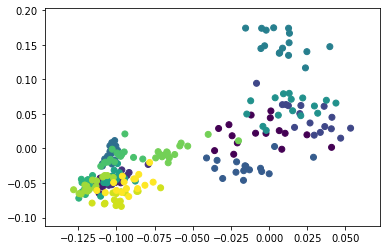

In [13]:
plt.scatter(X_pca[y<15][:, 0], X_pca[y<15][:, 1], c=y[y<15])

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

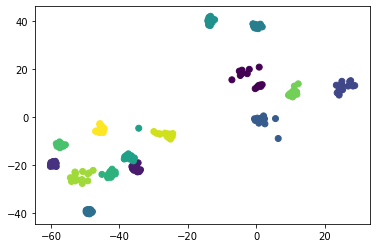

In [15]:
plt.scatter(X_tsne[y<15][:, 0], X_tsne[y<15][:, 1], c=y[y<15])

**Task 2. <a id="task2"></a> (1 points)** Specify the coordinates of the object with index 0 (`X[0]`) after applying the TSNE method. Round the numbers to hundredths.

In [16]:
cords_1_tsne = np.round(X_tsne[0], 2)
cords_1_tsne

array([-7.12, 15.6 ], dtype=float32)

**Task 3. <a id="task3"></a> (1 points)** Specify the coordinates of the object with index 0 (`X[0]`) after applying the PCA method. Round the numbers to hundredths.

In [17]:
cords_1_pca = np.round(X_pca[0], 2)
cords_1_pca

array([-0.03,  0.03])

**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

**Ответ: 2**    
Подходит ответ под номером 2. При визуализации с помощью TSNE действительно видно отдельные классы объектов, они намного более separable, чем при использовании PCA. 

## K_means

**Task 5. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [18]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax): 
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters #кластеры
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters #число итераций
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        #находим все элементы из X, для которых label = текущее значение кластера, 
        #а заем берем для всех таких X среднее по оси axis=0, 
        #чтобы получилась нужная размерность
        new_cent = []
        for i in range(self.n_clusters):
            #Если в какой-то момент кластер переместился, что точки вокруг него - пустое множество
            if (len(X[self.labels == i]))==0:
                new_cent.append(np.zeros(X.shape[1]))
            else:
                new_cent.append(X[self.labels == i].mean(axis=0))
        centers=np.array(new_cent)
        return centers 
    
    def update_lables(self, X):
        #Для этого есть специально импортированная функция 
        # This function computes for each row in X, the index of the row of Y which is closest
        # From https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html
        labels = pairwise_distances_argmin(X, self.centers) 
        return labels 

    def fit(self, X):
        #Задаем точки случайным образом 
        #Нужно задать центры как координаты некоторых существущих точек,
        #чтобы не было возможности образования пустых кластеров
        self.centers = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]
        #self.centers = np.random.uniform(0, X.max(), (self.n_clusters, X.shape[1]))
        new_labels = self.update_lables(X)
        self.labels = new_labels

        for it in range(self.n_iters):
            new_labels = self.update_lables(X)
            self.labels = new_labels
            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0
      
            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);

        fig, ax = plt.subplots(1,1)
        plot_clust(X, new_centers, new_labels, ax)
        return 1
    
    def predict(self, X):
        labels = self.update_lables(X)
        return labels

Generating data for clustering

In [19]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [20]:
X, y = noisy_blobs

**Task 6. <a id="task6"></a> (1.5 points)** 

6.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=100`. Specify the response for the object with index 1.

Converge by tolerance centers


0

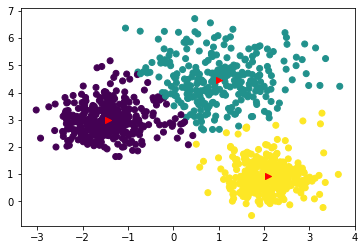

In [21]:
model_100 = MyKMeans(n_clusters=3, n_iters=100)
model_100.fit(X)

In [22]:
print(f"cluster #{model_100.labels[1]} with center {model_100.centers[1]}")

cluster #1 with center [1.00650451 4.47804083]


6.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 5`. Specify the response for the object with index 1.

Converge by tolerance centers


0

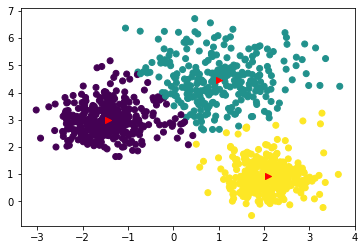

In [23]:
model_5 = MyKMeans(n_clusters=3, n_iters=5)
model_5.fit(X)

In [24]:
print(f"cluster #{model_5.labels[1]} with center {model_5.centers[1]}")

cluster #1 with center [1.00650451 4.47804083]


6.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 5 to 100

In [25]:
num_of_changed = (model_100.labels != model_5.labels).sum()
num_of_changed

0

Ни один объект не изменил кластер, это означает, что первая модель работает за столько же итераций, за сколько и вторая.  
Это логично, потому что обе модели выходят не когда заканчивается цикл по итерациям, а раньше, обе модели (метод fit в них) возвращает 0

**Давайте попробуем поставить n_iters = 3, чтобы были видны какие-то различия между моделями. Затем посморим на объект с индексом 1 (аналогично предыдущим ячейкам)**

1

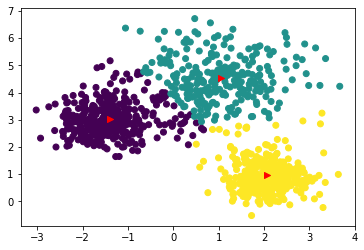

In [26]:
model_3 = MyKMeans(n_clusters=3, n_iters=3)
model_3.fit(X)

In [27]:
print(f"cluster #{model_3.labels[1]} with center {model_3.centers[1]}")

cluster #1 with center [1.04613247 4.53660016]


**Видно, что хотя номер кластера и не поменялся, его центр отличается от полностью завершенной кластеризации (когда происходит выход не по условию достижения max_iter). Давайте посмотрим на количество объектов, которые изменили свой кластер, относительно первых двух моделей**

In [28]:
num_of_changed = (model_100.labels != model_3.labels).sum()
num_of_changed

14

**Получается, что на следующих итерациях свой кластер поменяли бы 14 объектов**

**Task 7. <a id="task6"></a> (1.5 points)** 

Using the elbow method, select the optimal number of clusters. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them. To do this, iterate the parameter k from 2 to 50 in steps of 2. 

In [29]:
from sklearn.metrics import pairwise_distances

In [30]:
def get_distances_metric(model, X):
    res_sum = 0
    for i in range(len(model.centers)):
        if len(X[model.labels==i])!=0:
            res_sum += np.sum(np.square(pairwise_distances(X[model.labels==i], [model.centers[i]], metric='euclidean')))
    return res_sum

Converge by tolerance centers


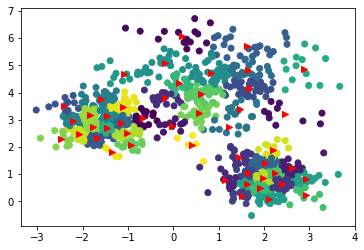

In [31]:
distances_metric = []
for k in range(2,50,2):
    print(k)
    model = MyKMeans(n_clusters=k, n_iters=1000)
    model.fit(X)
    distances_metric.append(get_distances_metric(model, X))

In [32]:
distances_metric

[2124.7464800565185,
 687.4909444309264,
 534.6094616620614,
 426.30791548442784,
 405.8324881884603,
 354.35938996225417,
 293.9021048069353,
 239.71889148697312,
 213.33848638092113,
 186.10745255929828,
 175.44543314143218,
 161.0866849789635,
 143.56381800039279,
 130.01232194873955,
 124.91531382460819,
 113.7345588992215,
 110.98042446754816,
 106.12042752450374,
 98.81525775946373,
 93.16635112370196,
 86.83829135997256,
 83.92226088834315,
 83.08228625142833,
 82.08445112233316]

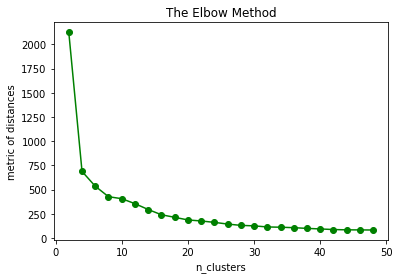

In [33]:
# частично из https://predictivehacks.com/k-means-elbow-method-code-for-python/
plt.plot(range(2,50,2), distances_metric, 'go-')
plt.xlabel('n_clusters')
plt.ylabel('metric of distances')
plt.title('The Elbow Method')
plt.show()

**Чтобы выбрать оптимальное число n_clusters, нам нужно найти точку, после которой уменьшение становится почти линейным**

Мне кажется, что исходя из графика, оптимальное количество кластеров = 12

Converge by tolerance centers


0

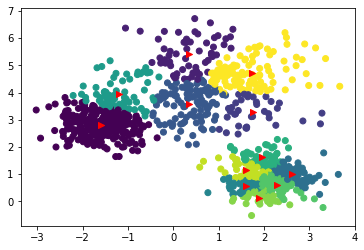

In [34]:
k=12
model = MyKMeans(n_clusters=k, n_iters=1000)
model.fit(X)

## DBSCAN

**Task 8. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.5` hyperparameter. Specify the response for the object with index 1.

In [35]:
#Эту функцию я взяла из семинара 10, но немного изменила
def draw_clust(X, y):
    for cluster_label in np.unique(y):
        plt.scatter(X[y == cluster_label, 0],    
                    X[y == cluster_label, 1],    
                    label=str(cluster_label))   
    plt.show()

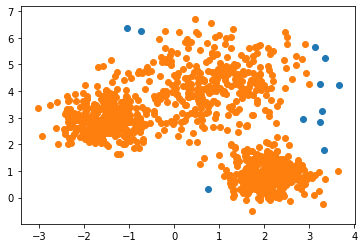

In [36]:
from sklearn import cluster

model = cluster.DBSCAN(eps=0.5)
y_pred = model.fit_predict(X)

draw_clust(X, y_pred)

In [37]:
print(f"1 index object: cluster #{y_pred[1]}")

1 index object: cluster #0


**Task 9. <a id="task8"></a> (1 point)** 9.1 Specify the resulting number of clusters

In [38]:
num_of_clusters = (np.unique(model.labels_) != -1).sum()
num_of_clusters

1

9.2 How many objects were counted as outliers (marked -1)?

In [39]:
num_of_outliers = (model.labels_ == -1).sum()
num_of_outliers

11

Получается, что 11 объектов получились outliers, и всего был выделен 1 кластер.

**Если брать другой параметр eps, то количество кластеров увеличивается**

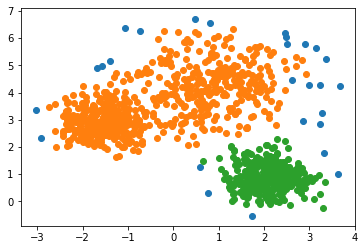

In [40]:
model2 = cluster.DBSCAN(eps=0.4)
y_pred2 = model2.fit_predict(X)

draw_clust(X, y_pred2)

In [41]:
print(f"1 index object: cluster #{y_pred2[1]}")
num_of_clusters = (np.unique(model2.labels_) != -1).sum()
print(f"num of clusters = {num_of_clusters}")
num_of_outliers = (model2.labels_ == -1).sum()
print(f"num of outliers = {num_of_outliers}")

1 index object: cluster #0
num of clusters = 2
num of outliers = 27


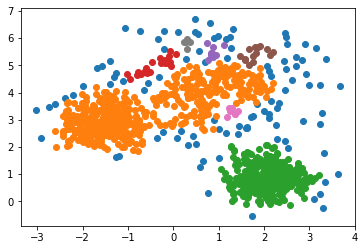

1 index object: cluster #0
num of clusters = 7
num of outliers = 101


In [42]:
model3 = cluster.DBSCAN(eps=0.25)
y_pred3 = model3.fit_predict(X)

draw_clust(X, y_pred3)

print(f"1 index object: cluster #{y_pred3[1]}")
num_of_clusters = (np.unique(model3.labels_) != -1).sum()
print(f"num of clusters = {num_of_clusters}")
num_of_outliers = (model3.labels_ == -1).sum()
print(f"num of outliers = {num_of_outliers}")